<a href="https://colab.research.google.com/github/Somtochukwu-Achikanu/Ibm-datascience/blob/main/Anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=0bf9f4b6dc5b89e39d3d6592616471703ccd2fbe381103873d93d0e2d54d0985
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [3]:
late_shipment = pd.read_feather('/content/late_shipments.feather')
print(late_shipment)

          id       country managed_by  fulfill_via vendor_inco_term  \
0    36203.0       Nigeria   PMO - US  Direct Drop              EXW   
1    30998.0      Botswana   PMO - US  Direct Drop              EXW   
2    69871.0       Vietnam   PMO - US  Direct Drop              EXW   
3    17648.0  South Africa   PMO - US  Direct Drop              DDP   
4     5647.0        Uganda   PMO - US  Direct Drop              EXW   
..       ...           ...        ...          ...              ...   
995  13608.0        Uganda   PMO - US  Direct Drop              DDP   
996  80394.0    Congo, DRC   PMO - US  Direct Drop              EXW   
997  61675.0        Zambia   PMO - US  Direct Drop              EXW   
998  39182.0  South Africa   PMO - US  Direct Drop              DDP   
999   5645.0      Botswana   PMO - US  Direct Drop              EXW   

    shipment_mode  late_delivery late product_group    sub_classification  \
0             Air            1.0  Yes          HRDT              HIV t

Here, we'll return to the late shipments data, and how the price of each package (pack_price) varies between the three shipment modes (shipment_mode): "Air", "Air Charter", and "Ocean"

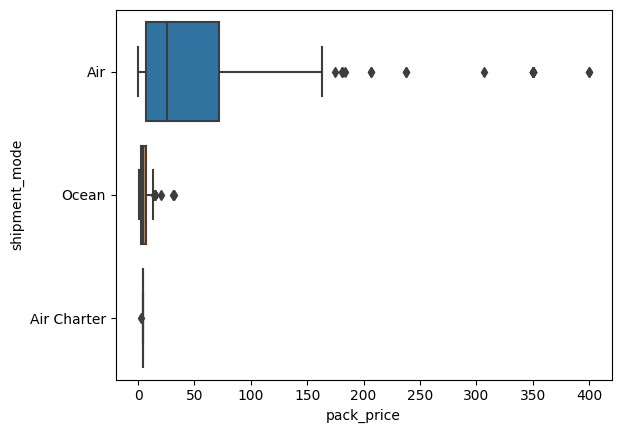

In [5]:
#To first understand and analyse the data

# The mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipment.groupby("shipment_mode")['pack_price'].mean()

# The standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipment.groupby("shipment_mode")['pack_price'].std()

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x='pack_price',y='shipment_mode', data=late_shipment)
plt.show()

Anova Test is conducted to check the difference statistically between the three groups which are Air, Ocean and Air Charter

In [7]:
#Running an Anova test
import pingouin
anova_results = pingouin.anova(data=late_shipment, dv='pack_price',between='shipment_mode')
print(anova_results)

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


Assuming a significance level of 0.1,The p value is less than or equal to the significant level so the null hypothesis should be rejected

# Pairwise Tests

In [8]:
#Performing a pairwise t-tests on late_shipments's pack_price variable, grouped by shipment_mode, without doing any p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipment, dv='pack_price', between='shipment_mode', padjust='None')
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc       BF10    hedges  
0  600.685682   two-sided  8.748346e-75  5.809e+76  0.726592  
1  986.979785   two-sided  6.934555e-71  1.129e+67  0.711119  
2   35.615026   two-sided  3.123012e-03     15.277 -0.423775  


In [10]:
#Modifying the p value using the Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipment, dv='pack_price', between='shipment_mode', padjust='bonf')
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc        p-corr p-adjust       BF10  \
0  600.685682   two-sided  8.748346e-75  2.624504e-74     bonf  5.809e+76   
1  986.979785   two-sided  6.934555e-71  2.080367e-70     bonf  1.129e+67   
2   35.615026   two-sided  3.123012e-03  9.369037e-03     bonf     15.277   

     hedges  
0  0.726592  
1  0.711119  
2 -0.423775  


Using the Bonferroni correction results and assuming a significance level of 0.1,the Ocean and Air Charter, ocen and air, Air charter and Air pairs are all less than o.1,so the null hypothesis should be rejected